In [1]:
import neurom
from neurom import viewer
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

import sys
print(sys.path)

sys.path[0] = str(Path(sys.path[0]).parent) # modify sys.path to start with root folder of repo
from src import visualize, swc2voxel, combine_swc_img, image_process, octree, read_swc

['/cis/home/afiallos/mouselight_code/notebooks', '/cis/home/afiallos/miniconda3/lib/python37.zip', '/cis/home/afiallos/miniconda3/lib/python3.7', '/cis/home/afiallos/miniconda3/lib/python3.7/lib-dynload', '', '/cis/home/afiallos/miniconda3/lib/python3.7/site-packages', '/cis/home/afiallos/miniconda3/lib/python3.7/site-packages/IPython/extensions', '/cis/home/afiallos/.ipython']


In [2]:
im_path = '/cis/net/io50/data/janelia-data/2018-08-01'
swc_path1 = '/cis/net/io50/data/janelia-data/2018-08-01/swcs/17_9_19_consensus/2018-08-01-consensus-swcs/2018-08-01_G-002_consensus.swc'
swc_path2 = '/cis/net/io50/data/janelia-data/2018-08-01/swcs/1_9_19_frags/frags/auto111_cc-96783_branch-0002.swc'
swc_path3 = im_path + '/swcs/1_9_19_frags/frags/auto111_cc-385526_branch-0002.swc'
swc_path4 = im_path + '/swcs/1_9_19_frags/frags/auto111_cc-50692_branch-0034.swc'

tree = octree.octree(im_path)



number of levels of octree: 7
origin in spatial coords: [70093.276 15071.596 29306.737]
spatial dimension of entire octree volume in um: [10095.672  7793.047 13157.636]
voxel dimension of entire octree volume : [33792 25600 13312]
spacing at highest level in um: [19.12059091 19.4826175  63.25786538]
spacing at lowest level in um: [0.29875923 0.3044159  0.98840415]
tif image shape (x,y,z): [528 400 208]


In [28]:
len(hist_data[33]), len(hist_data[43])

(509, 568)

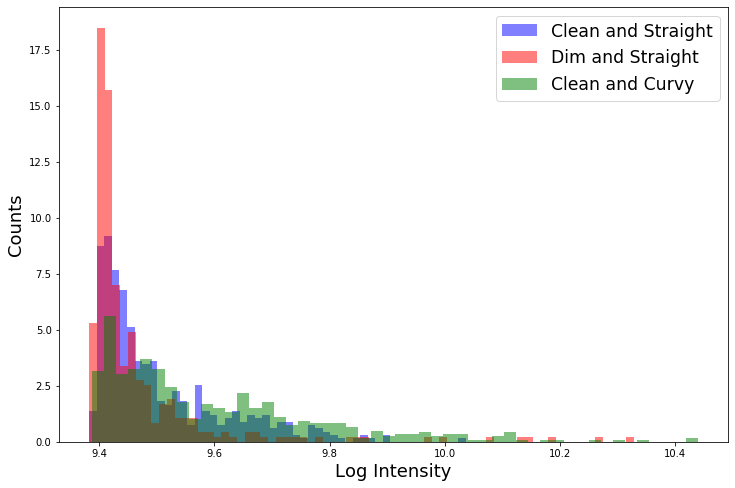

In [44]:
plt.figure(figsize = (12,8))
plt.hist(np.log(hist_data[33]), color = 'b', alpha = 0.5, bins = 50, density = True ,label = "Clean and Straight")
plt.hist(np.log(hist_data[38]), color = 'r', alpha = 0.5, bins = 70, density = True, label = "Dim and Straight")
plt.hist(np.log(hist_data[43]), color = 'g', alpha = 0.5, bins = 50, density = True, label = "Clean and Curvy")
plt.legend(loc = 0, fontsize= 'xx-large')
plt.xlabel("Log Intensity", fontsize = 18)
plt.ylabel("Counts", fontsize = 18)

plt.savefig("Log_intensity.png")

0
   index  sample  structure             x             y             z    r  \
0      0       1          0  73940.221323  18869.828297  33732.256716  1.0   
1      1       2          0  73942.312638  18858.869325  33745.105970  1.0   
2      2       3          0  73942.312638  18833.907221  33732.256716  1.0   
3      3       4          0  73945.897749  18822.339417  33720.395867  1.0   
4      4       5          0  73939.325046  18822.948249  33705.569805  1.0   
5      5       6          0  73942.312638  18832.080726  33696.674167  1.0   
6      6       7          0  73953.067970  18839.386707  33685.801722  1.0   
7      7       8          0  73961.134470  18869.828297  33661.091618  1.0   
8      8       9          0  73893.316124  18969.676712  33642.311939  1.0   
9      9      10          0  73855.971220  19020.818583  33642.311939  1.0   

   parent  xvox  yvox  zvox  
0      -1   288   162    93  
1       1   295   126   106  
2       2   295    44    93  
3       3   307    

/cis/home/afiallos/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


   index  sample  structure             x             y             z    r  \
0    210     211          5  74599.874999  16466.113244  35811.859524  1.0   
1    211     212          0  74596.023514  16471.457021  35812.042919  1.0   
2    212     213          0  74591.093695  16464.271438  35829.851568  1.0   
3    213     214          0  74583.343752  16455.767562  35842.566171  1.0   
4    214     215          0  74587.492246  16444.214771  35850.597437  1.0   
5    215     216          0  74586.336013  16421.716831  35877.210991  1.0   
6    216     217          6  74575.484401  16411.953077  35887.046771  1.0   
7    217     218          0  74603.046982  16470.076150  35806.972521  1.0   
8    218     219          6  74600.367193  16473.150335  35806.496176  1.0   
9    219     220          6  74597.695282  16449.066399  35836.625128  1.0   

   parent  xvox  yvox  zvox  
0     210    88   185     7  
1     211    75   203     8  
2     212    59   179    26  
3     213    33   151

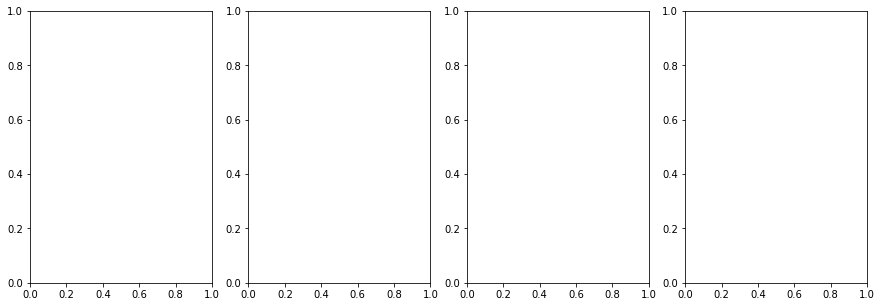

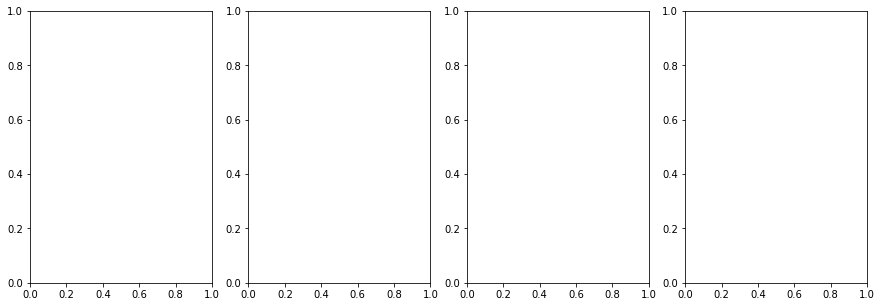

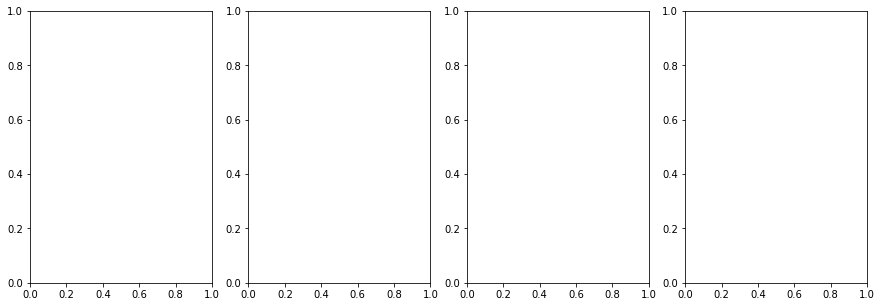

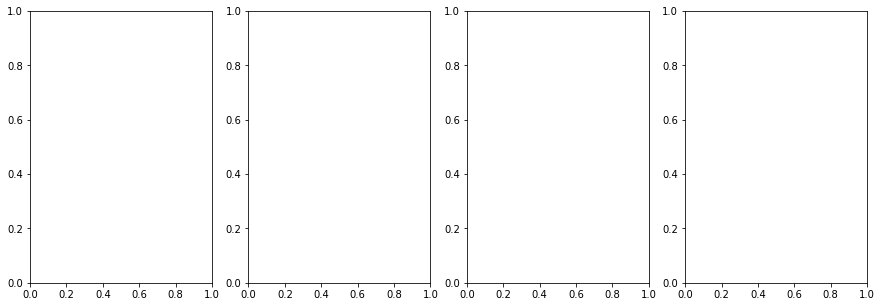

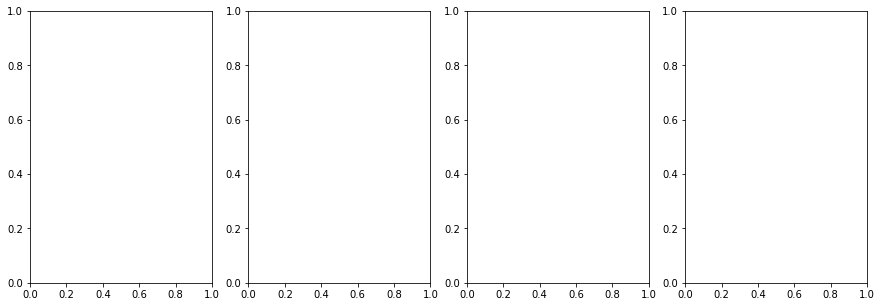

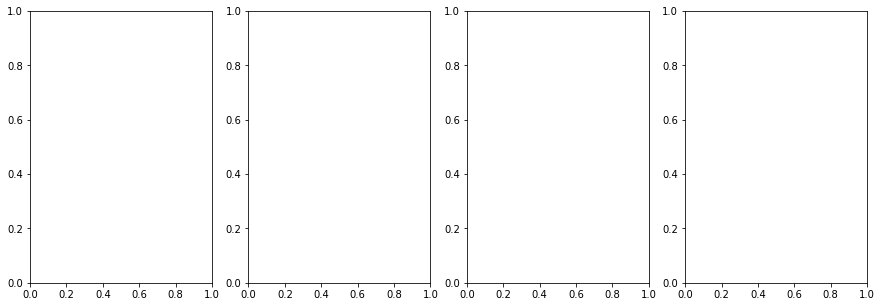

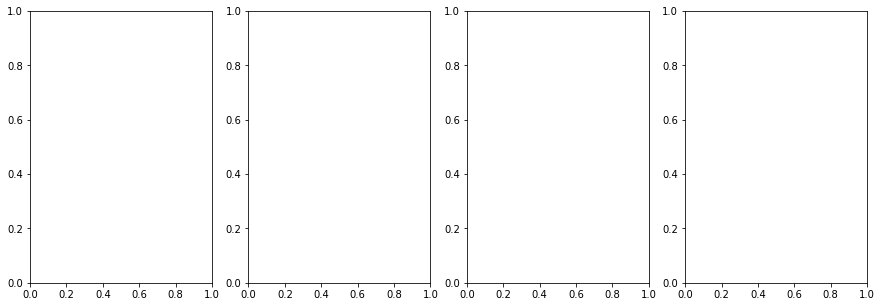

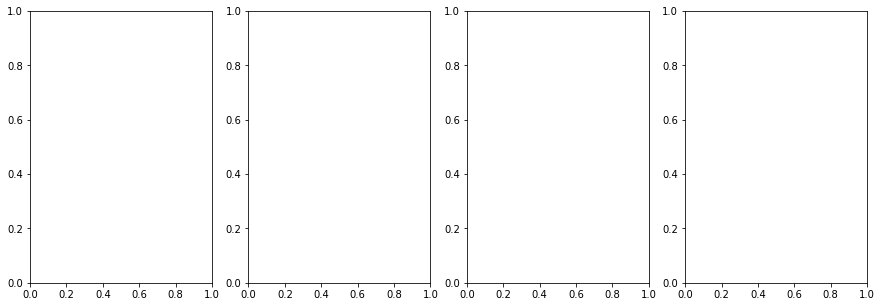

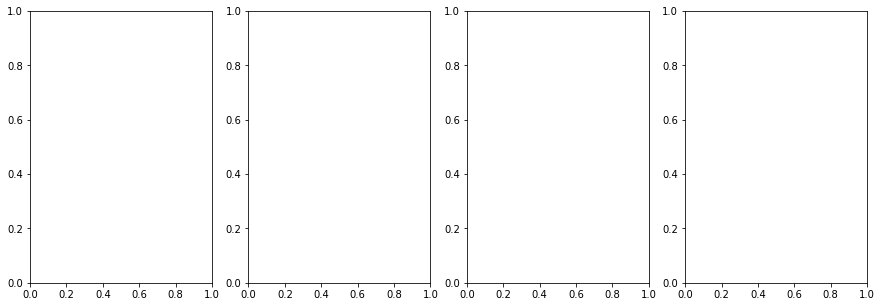

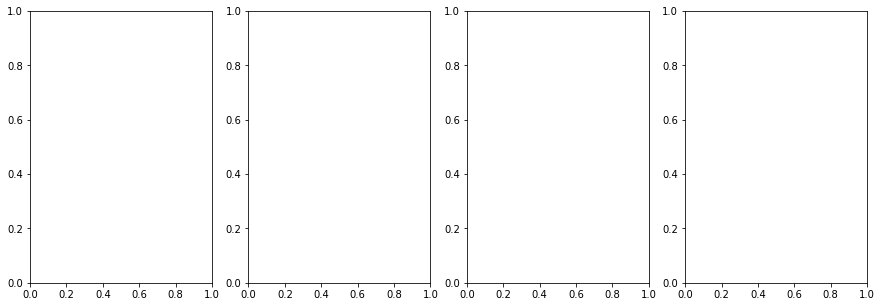

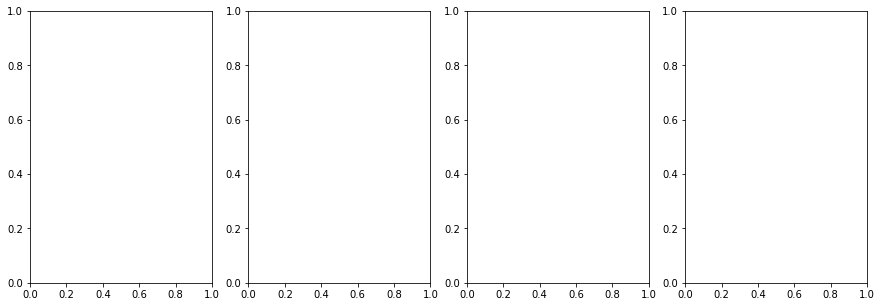

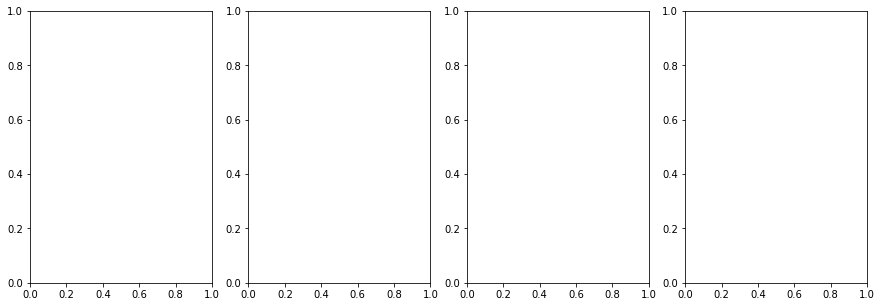

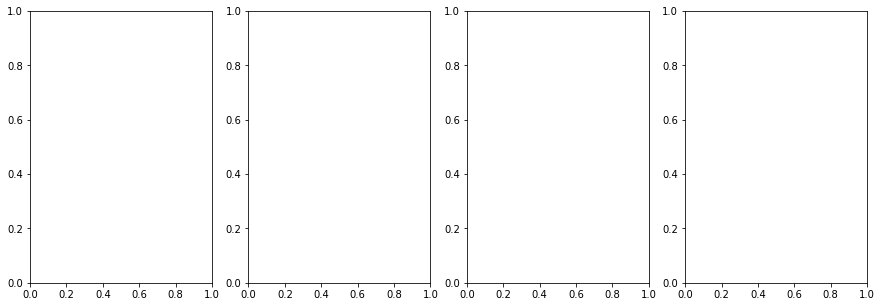

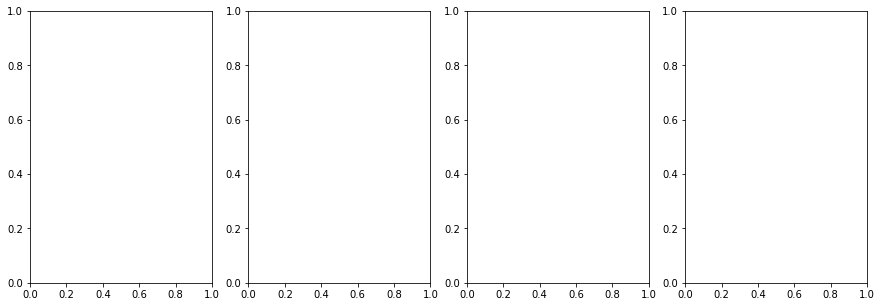

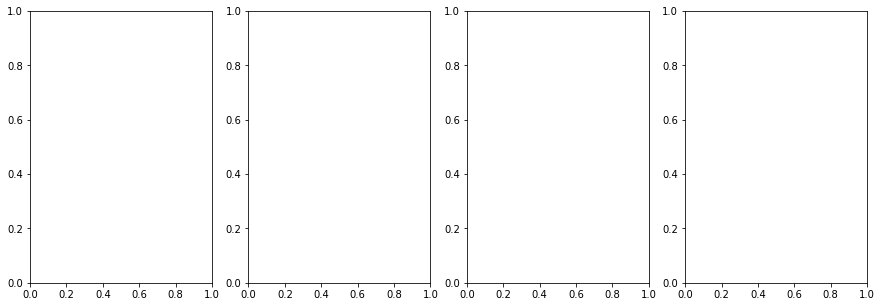

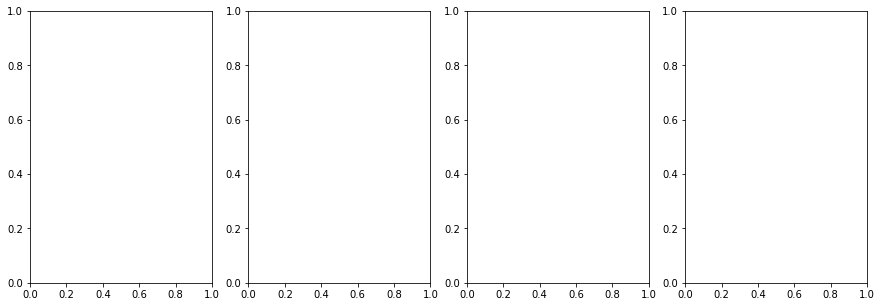

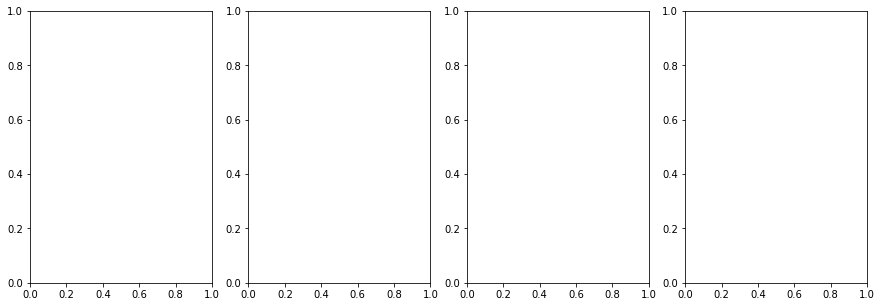

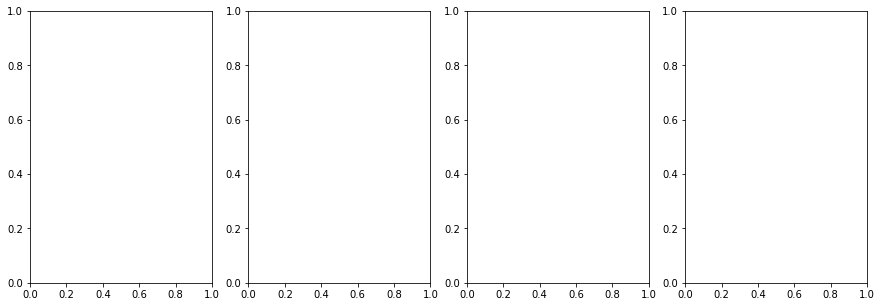

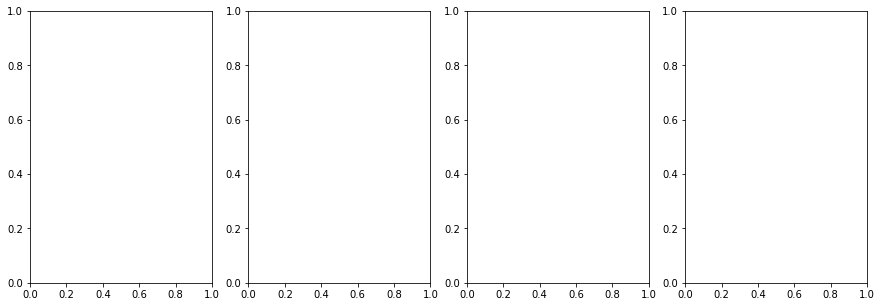

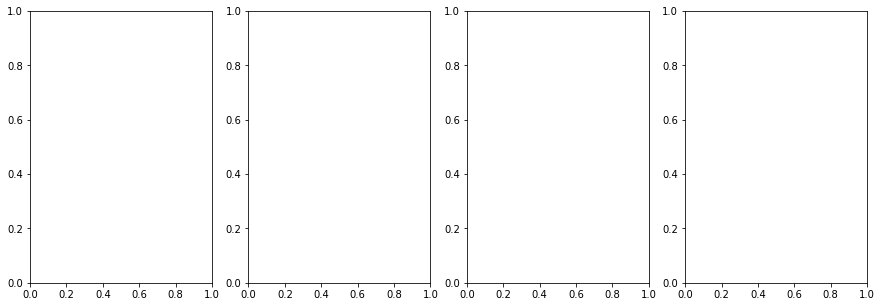

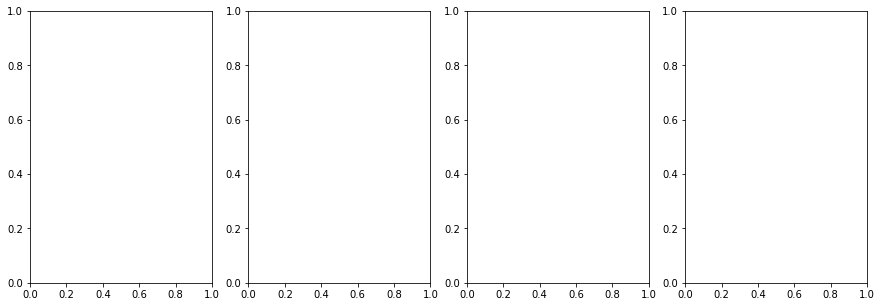

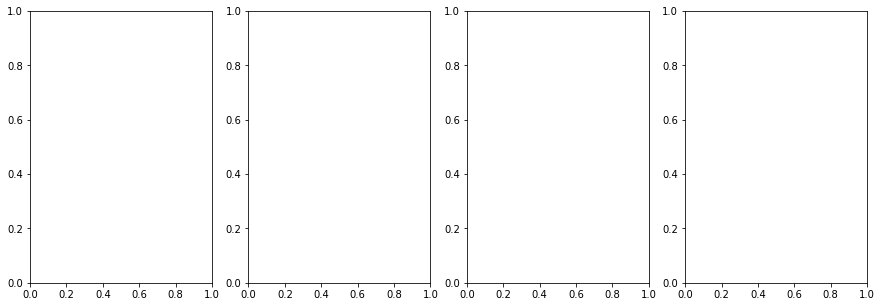

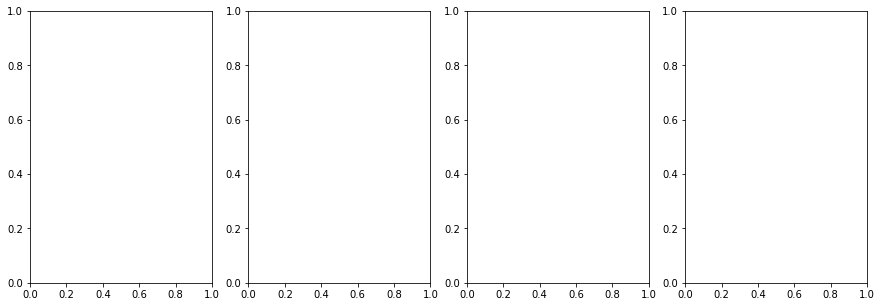

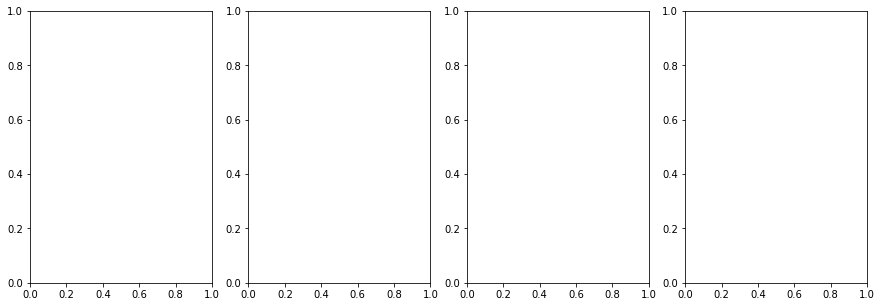

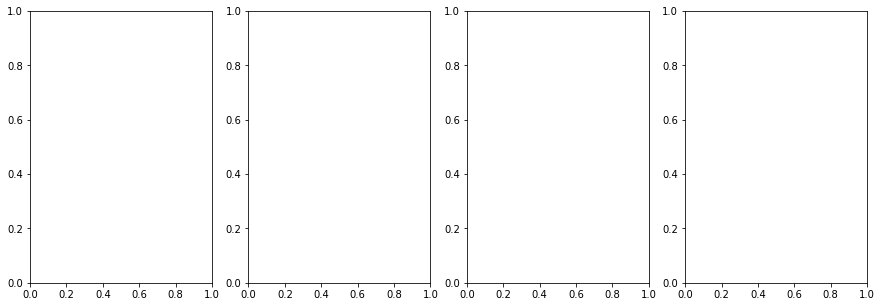

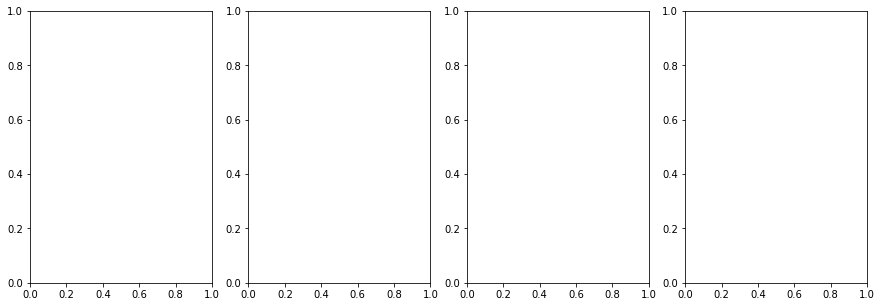

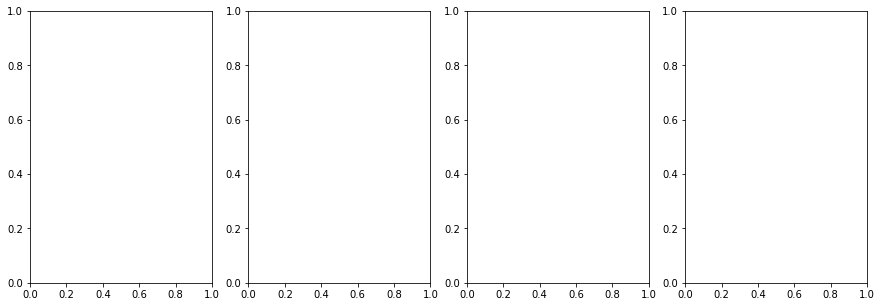

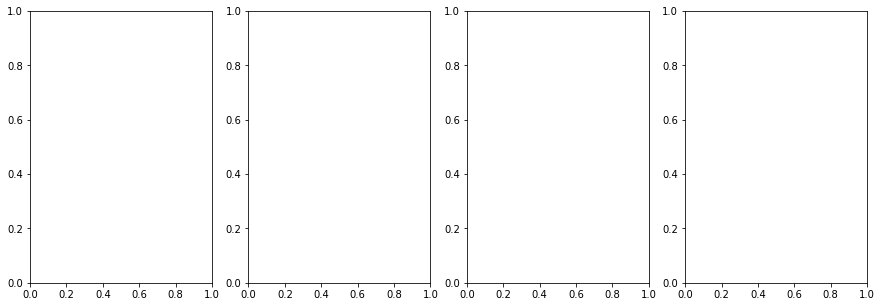

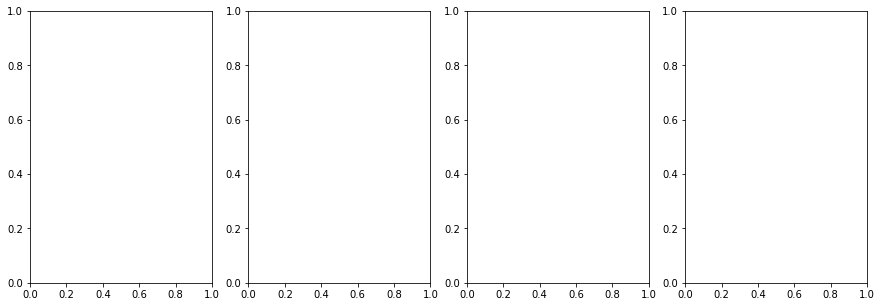

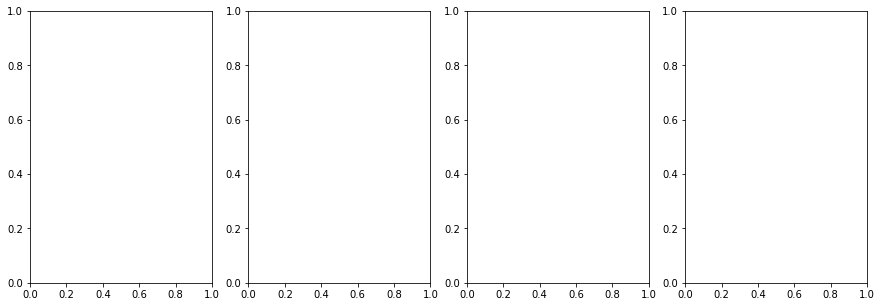

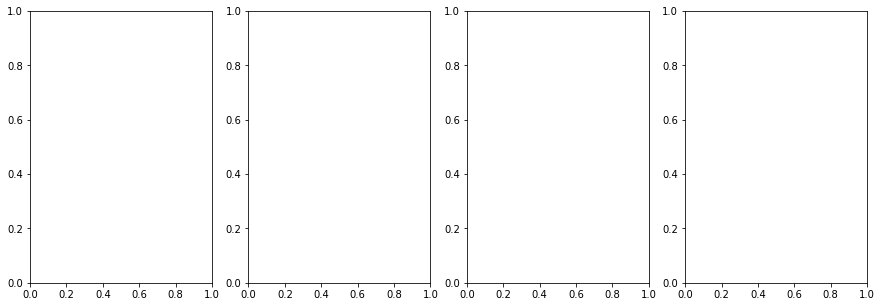

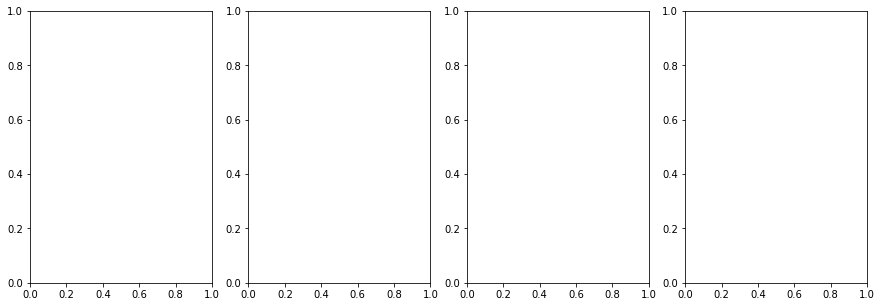

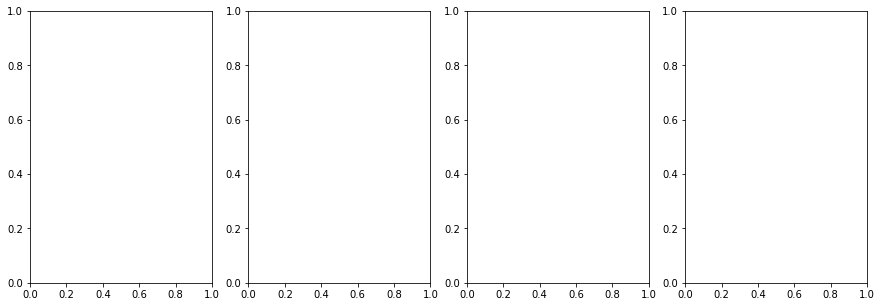

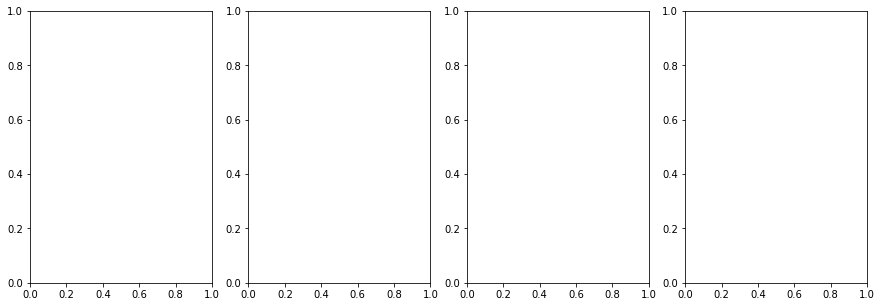

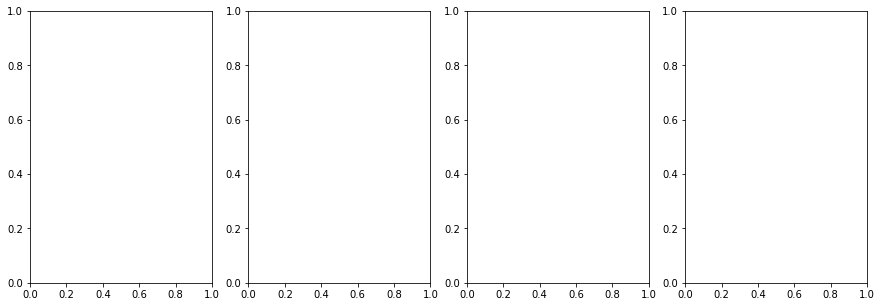

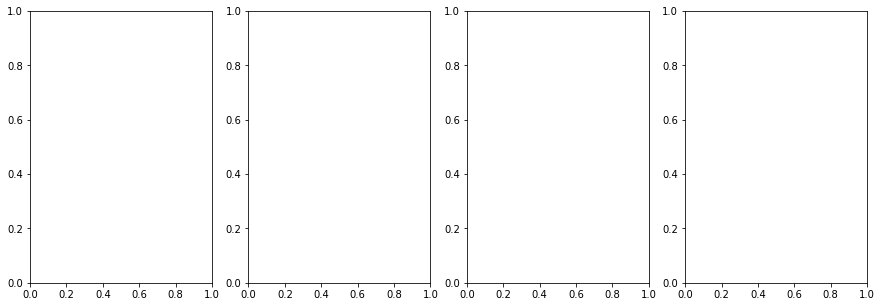

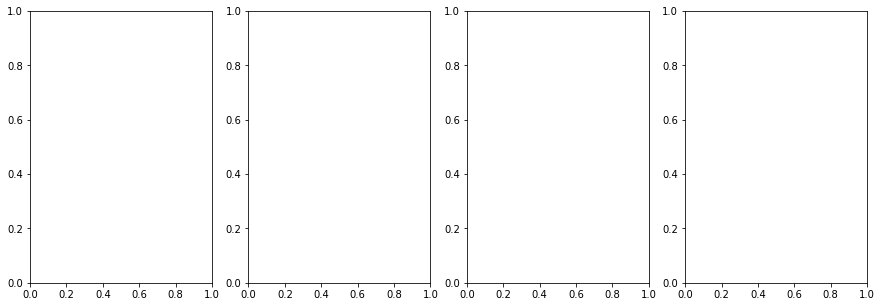

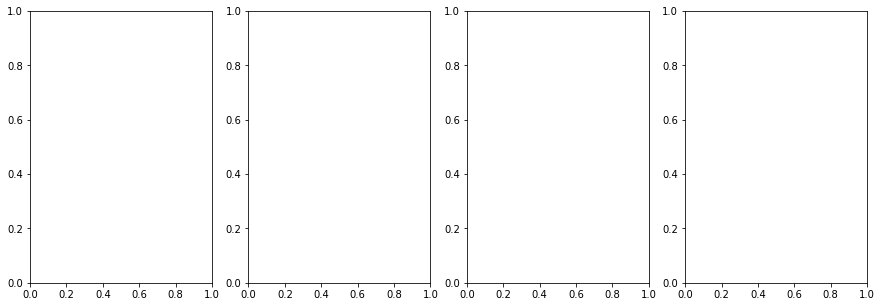

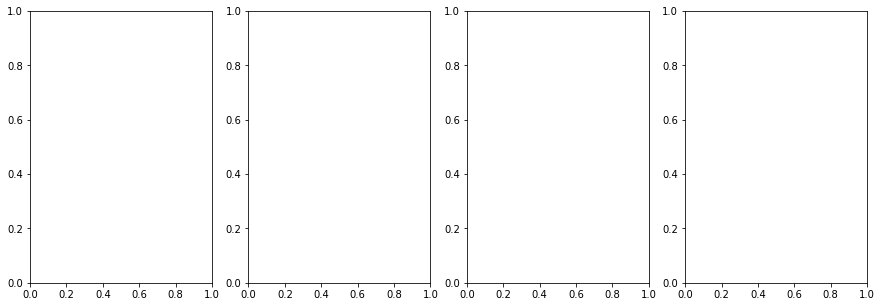

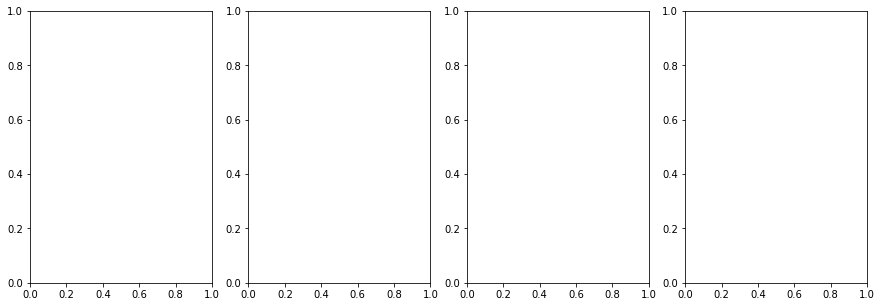

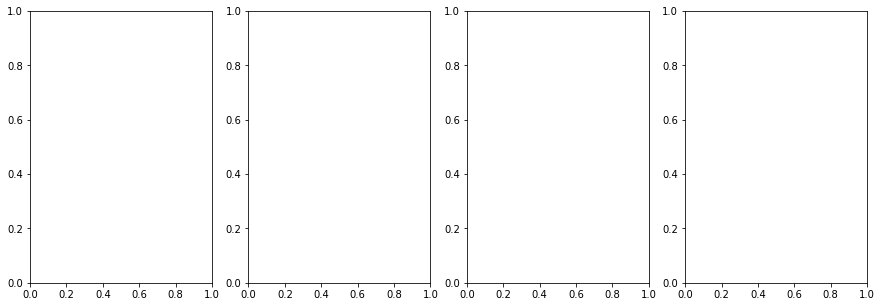

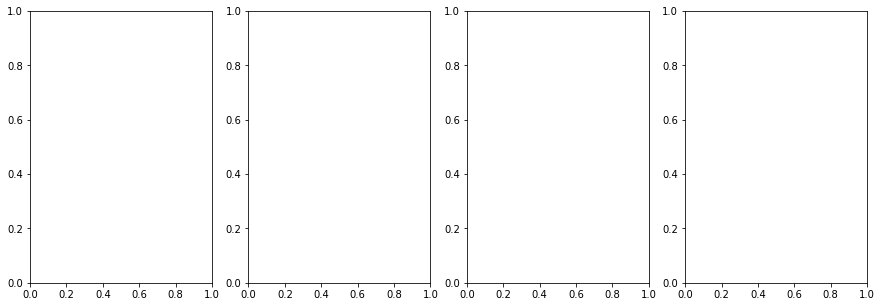

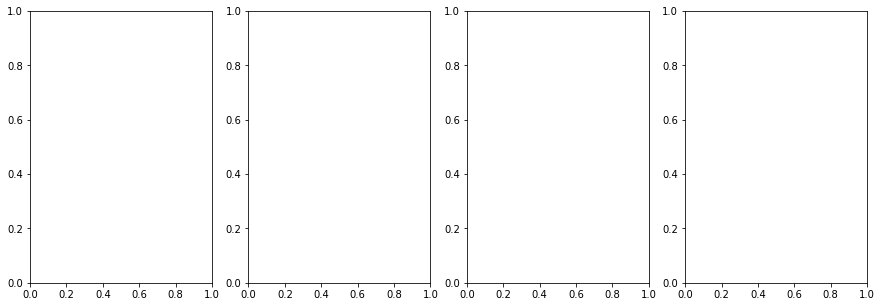

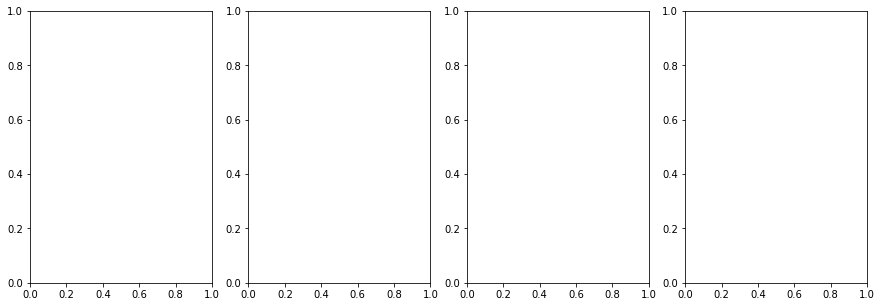

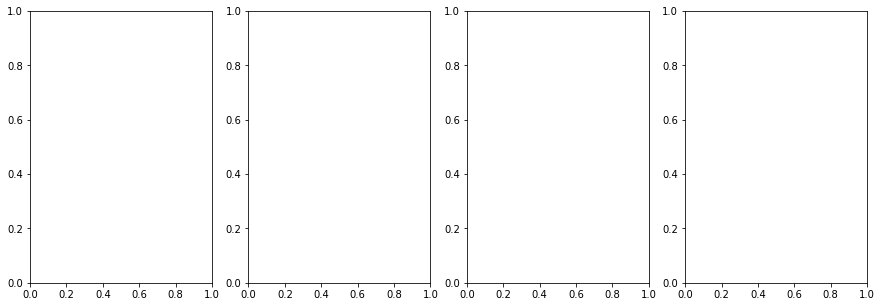

In [12]:
def plot_skel_intensities(octree, swc_path, nbins = 5, interval = 10):

    df,_,_,_ = read_swc.read_swc_offset(swc_path)
    num_pts = df.shape[0]
    # Saving hist values to be plotted outside
    hist_data = []
    
    for i in range(0, num_pts, interval):
        print(i)
        img,start = combine_swc_img.points2img(tree,df.iloc[i:i+interval].reset_index())
        points = combine_swc_img.points2voxel(tree,df.iloc[i:i+interval].reset_index(),start)
        skel = swc2voxel.skeletonize(img, points)
        voxels = points[['xvox','yvox','zvox']].values

        outline = img[skel == 1]
        #noise = img[skel == 0]

        axis = visualize.find_smalldim(img)
        if axis == 0:
            x = voxels[:,1]
            y = voxels[:,2]
            c = voxels[:,axis] - img.shape[axis]/2
        elif axis == 1:
            x = voxels[:,0]
            y = voxels[:,2]
            c = voxels[:,axis] - img.shape[axis]/2
        elif axis == 2:
            x = voxels[:,0]
            y = voxels[:,1]
            c = voxels[:,axis] - img.shape[axis]/2

        img = np.amax(img,axis)
        img = np.swapaxes(img,0,1)
        skel = np.amax(skel, axis)
        skel = np.swapaxes(skel,0,1)

        plt.rcParams['figure.figsize'] = (15,5)
        fig, axes = plt.subplots(1,4)
        #plt.subplots_adjust(wspace = 0.3)

        axes[0].imshow(img)
        sc = axes[0].scatter(x, y, c = c, cmap = 'magma', s = 6)
        axes[0].title.set_text("Image+Fragment")
        axes[0].axis('off')
        axes[1].imshow(skel)
        axes[1].title.set_text("Fragment Skeleton")
#         cbar = plt.colorbar(sc)
#         cbar.ax.get_yaxis()
        axes[1].axis('off')
        axes[2].imshow(((img-np.min(img))*skel)/np.max(img))
        axes[2].title.set_text("Actual Intensities")
        cbar = plt.colorbar(sc)
        cbar.ax.get_yaxis()
        axes[2].axis('off')
        axes[3].hist(outline, bins = nbins, edgecolor = 'black')
        axes[3].title.set_text("Skeleton Voxel Intensities")
        
        plt.show()
        hist_data.append(outline)

    return hist_data
    
hist_data = plot_skel_intensities(tree,swc_path1, nbins = 30)
# ones = np.where(skel == 1)
# noise = img[skel == 0 ] 
# visualize.plot_image_hist(outline)

# INcorporatie in simpleITK if possible, don't rewrite functions 
# ISsue: Fix reading swcs into neurom, read images into neurom for  